# Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

## Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

## Points to Remember:

*	There are no null values in the dataset. 
*	There may be some customers with no loan history. 
*	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
*	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
*	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import datetime as dt

#Import zscore
from scipy.stats import zscore

#Import preprocessing libraries
from sklearn.preprocessing import PowerTransformer, StandardScaler

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import Smote
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import train test split
from sklearn.model_selection import train_test_split

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

#Import pickle
import pickle

In [2]:
#Read dataset
df = pd.read_csv(r"C:\Users\singh\Downloads\Micro-Credit-Project--1---1-\Micro Credit Project\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


* In this dataset Label is my target column and I'll have predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case Label 1 indicates the loan has been paid and 0 indicates loan has not been paid so clearly it's a classification problem.

# Preprocessing and EDA

In [3]:
#Checking rows and columns of the dataset
df.shape

(209593, 37)

* This dataset contains rows and 37 columns.

In [4]:
#Checking all columns name
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#Cheking data types for all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
#Checking detailed information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

* No value present in the dataset.

In [7]:
#Checking unique values of the dataset
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [8]:
#Droping unnecessary columns
df.drop(columns = ['Unnamed: 0', 'pcircle', 'msisdn'], axis = 1, inplace = True)

In [9]:
#Checking null values
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

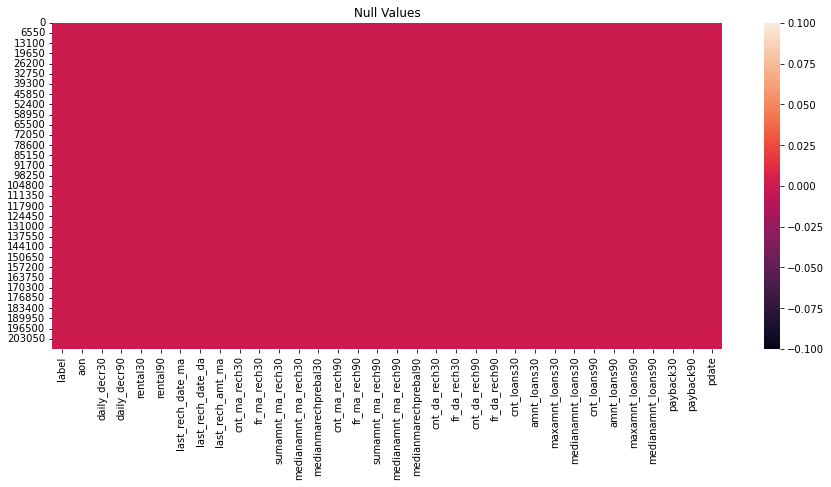

In [10]:
#Visualizing null values
plt.figure(figsize = (15,6))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

* From above plot we can say that no Null values present in this dataset.

In [11]:
#Checking unique values of target colum
df['label'].unique()

array([0, 1], dtype=int64)

# Feature Engineering

In [12]:
#Converting object type pdate to datetime
df['pdate'] = pd.to_datetime(df['pdate'])

In [13]:
#Extracting paid year, month and day from pdate
df['pyear'] = pd.to_datetime(df.pdate, format = '%d/%m/%Y').dt.year
df['pmonth'] = pd.to_datetime(df.pdate, format = '%d/%m/%Y').dt.month
df['pday'] = pd.to_datetime(df.pdate, format = '%d/%m/%Y').dt.day

#Droping pdate
df.drop('pdate', axis = 1, inplace = True)

In [14]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pyear,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016,6,22


In [15]:
#Checking uniue values of pyear
df['pyear'].unique()

array([2016], dtype=int64)

* It seems paid year has only one value which is 2016 hence droping this feature as well.

In [16]:
#Droping pyear
df.drop('pyear', axis = 1, inplace = True)

In [17]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [18]:
df['last_rech_date_da'].value_counts()

 0.000000         202861
 7.000000            163
 8.000000            160
 11.000000           149
 13.000000           148
 12.000000           147
 17.000000           123
 10.000000           122
 16.000000           121
 9.000000            120
 14.000000           114
 18.000000           113
 25.000000           107
 1.000000            105
 19.000000           105
 20.000000           104
 15.000000           102
 24.000000           102
 34.000000           100
 38.000000            99
 27.000000            96
 23.000000            96
 22.000000            91
 21.000000            91
 29.000000            90
 37.000000            89
 33.000000            83
 35.000000            83
 39.000000            81
 31.000000            80
 26.000000            80
 28.000000            77
 43.000000            77
 32.000000            74
 30.000000            73
 44.000000            71
 42.000000            67
 6.000000             63
 40.000000            61
 52.000000            54


In [19]:
df['cnt_da_rech30'].value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
5.000000            34
6.000000            27
7.000000            20
9.000000            12
8.000000             9
10.000000            5
11.000000            4
13.000000            3
12.000000            2
16.000000            2
86843.243516         1
38301.735125         1
82361.089303         1
74583.628476         1
26868.508793         1
49019.152438         1
87301.535743         1
56153.694289         1
27264.102268         1
76074.093652         1
7895.225810          1
44622.806152         1
64953.386125         1
70777.657782         1
14389.198553         1
40963.452408         1
11113.496217         1
98149.599533         1
29494.512441         1
24158.721763         1
54126.353703         1
26680.788160         1
12798.810841         1
56669.600838         1
16975.038283         1
59244.498321         1
52614.990468         1
55848.165083         1
50374.22234

In [20]:
df['fr_da_rech30'].value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
4.000000             45
6.000000             38
5.000000             36
8.000000             34
10.000000            19
9.000000             19
11.000000            18
12.000000            16
14.000000            15
13.000000            15
15.000000            13
18.000000            11
16.000000             9
19.000000             8
17.000000             6
20.000000             6
23.000000             2
21.000000             2
22.000000             2
561988.600180         1
643392.049475         1
710594.108677         1
670794.027857         1
947243.000614         1
931951.525738         1
946195.436874         1
950149.553129         1
904288.911261         1
926591.018098         1
551754.996181         1
765588.314389         1
799915.021285         1
738055.326743         1
749703.690875         1
706403.870136         1
992813.996039         1
526991.956751   

In [21]:
df['cnt_da_rech90'].value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64

In [22]:
df['fr_da_rech90'].value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64

In [23]:
df['medianamnt_loans30'].value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [24]:
df['medianamnt_loans90'].value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [25]:
#Droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [26]:
#Checking stats of the dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


* Seeing negative values in some columns will change that as well.

In [27]:
#Converting all negative values to positive values for the negative columns.
df['aon'] = abs(df['aon'])
df['daily_decr30'] = abs(df['daily_decr30'])
df['daily_decr90'] = abs(df['daily_decr90'])
df['rental30'] = abs(df['rental30'])
df['rental90'] = abs(df['rental90'])
df['last_rech_date_ma'] = abs(df['last_rech_date_ma'])
df['medianmarechprebal30'] = abs(df['medianmarechprebal30'])
df['medianmarechprebal90'] = abs(df['medianmarechprebal90'])

In [28]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3854.219020,6.31543,7.716780,12396.218352,1864.595821,94.436315,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.210975,7.19347,12.590251,16857.793882,2081.680664,368.606406,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.670000,2.00000,0.000000,2317.000000,773.000000,15.300000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,35.000000,4.00000,2.000000,7226.000000,1539.000000,37.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,85.300000,8.00000,8.000000,16000.000000,1924.000000,81.500000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


* I have successfully converted all the negative values to positive.

# Visualizations (Univariate Analysis)

In [29]:
#Checking for Categorical and Numerical columns
cat_cols = []
num_cols = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

print('Categorical Columns are: ', cat_cols)
print('*******************************************************************************************************************')
print('Numerical Columns are: ', num_cols)

Categorical Columns are:  []
*******************************************************************************************************************
Numerical Columns are:  ['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


* There is no categorical features present in this dataset.

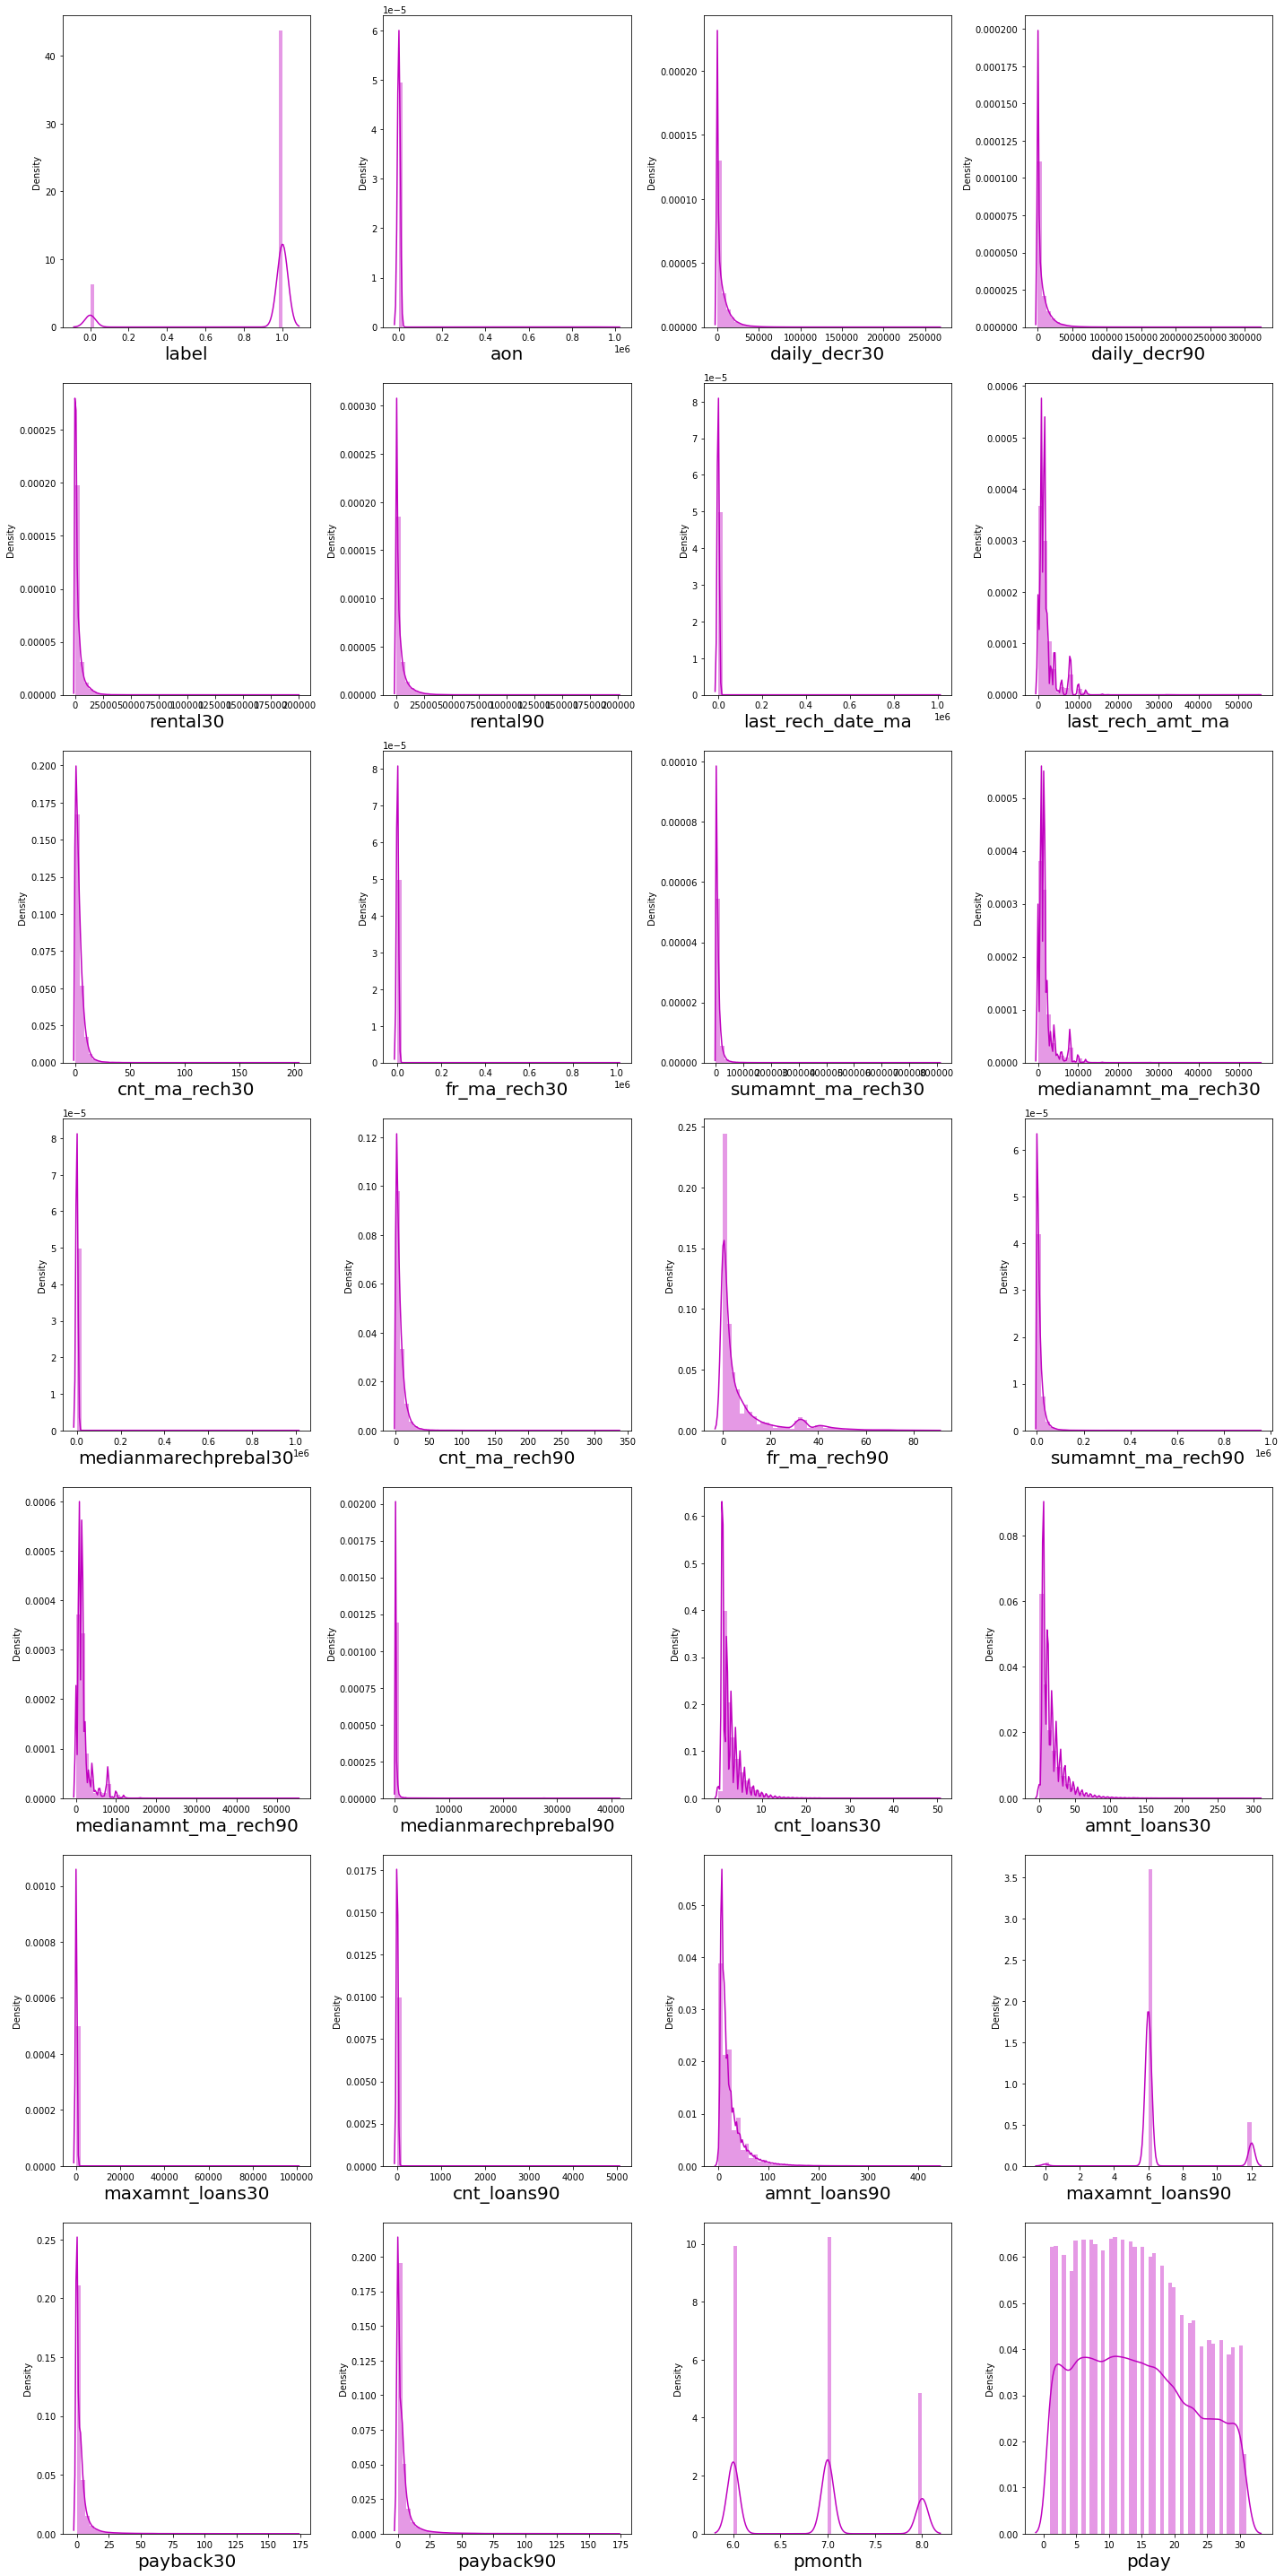

In [30]:
#Checking distribution of all numerical features
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[num_cols]:
    if plotnumber <= 28:
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

* Seeing skewness in most of the columns.

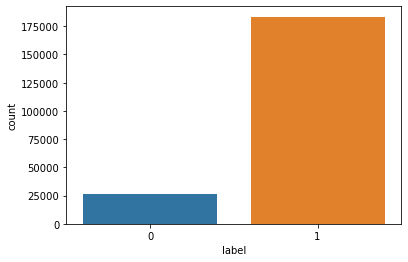

In [31]:
#Count plot of target column
sns.countplot(df['label'])
plt.show()

* Dataset is imbalanced will handle it in further process.

# Bivariate Analysis

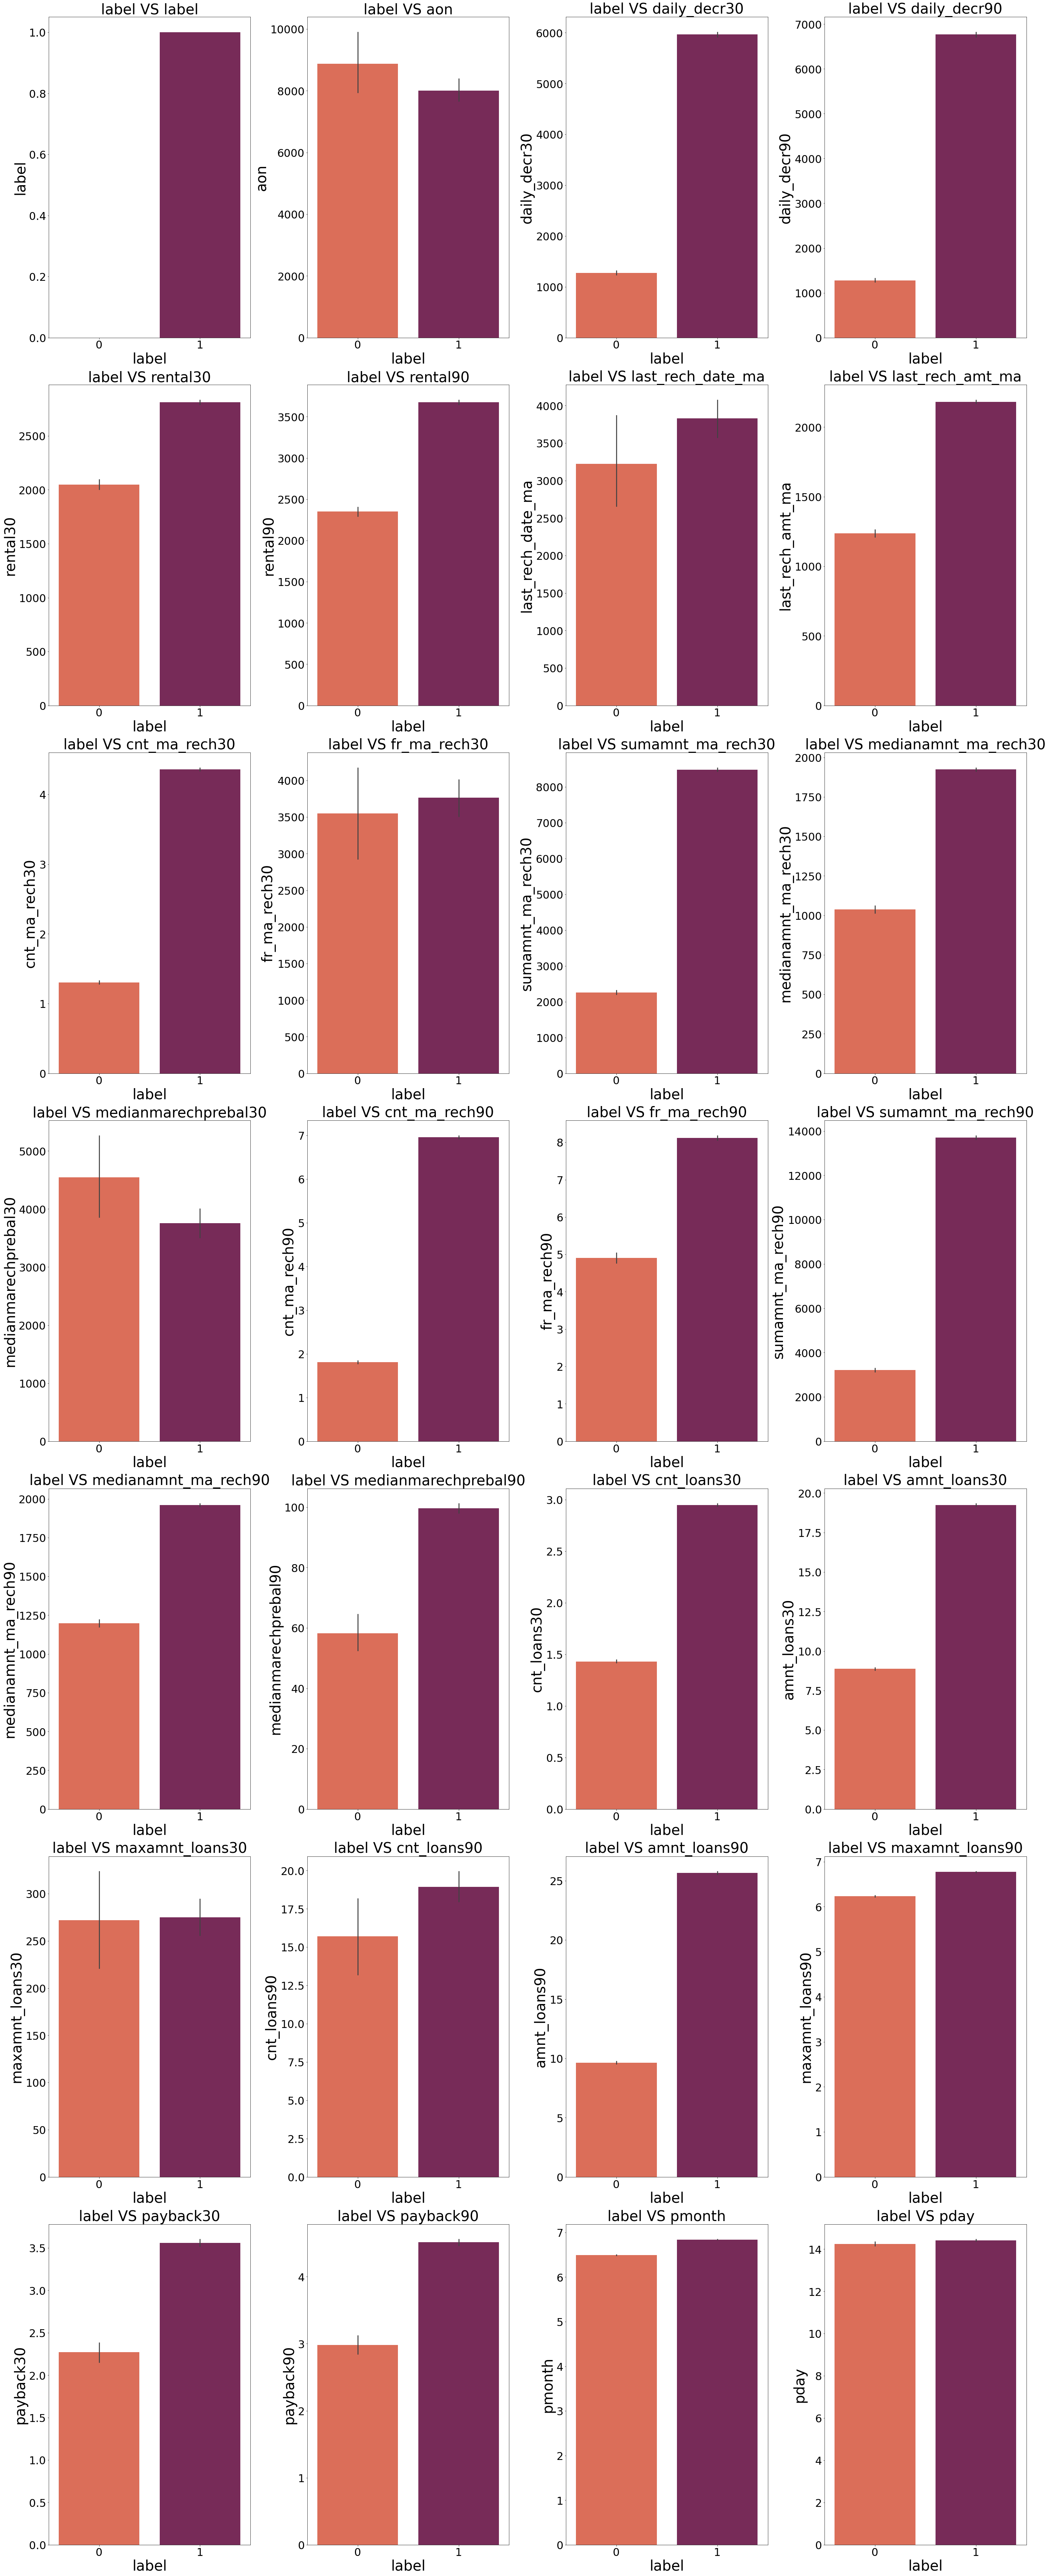

In [32]:
#barplot for numerical columns
plt.figure(figsize = (40,100))
for i in range(len(num_cols)):
    plt.subplot(7,4,i + 1)
    sns.barplot(x = df['label'], y = df[num_cols[i]], palette = "rocket_r")
    plt.title(f"label VS {num_cols[i]}",fontsize = 40)
    plt.xticks(fontsize = 30)  
    plt.yticks(fontsize = 30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(num_cols[i],fontsize = 40)
    plt.tight_layout()

#  Observations:

OBSERVATIONS:

* Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
* Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
* Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
* Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
* Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
* In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
* Below 14th of each month all the customers have paid there loan amount.

# Skewness

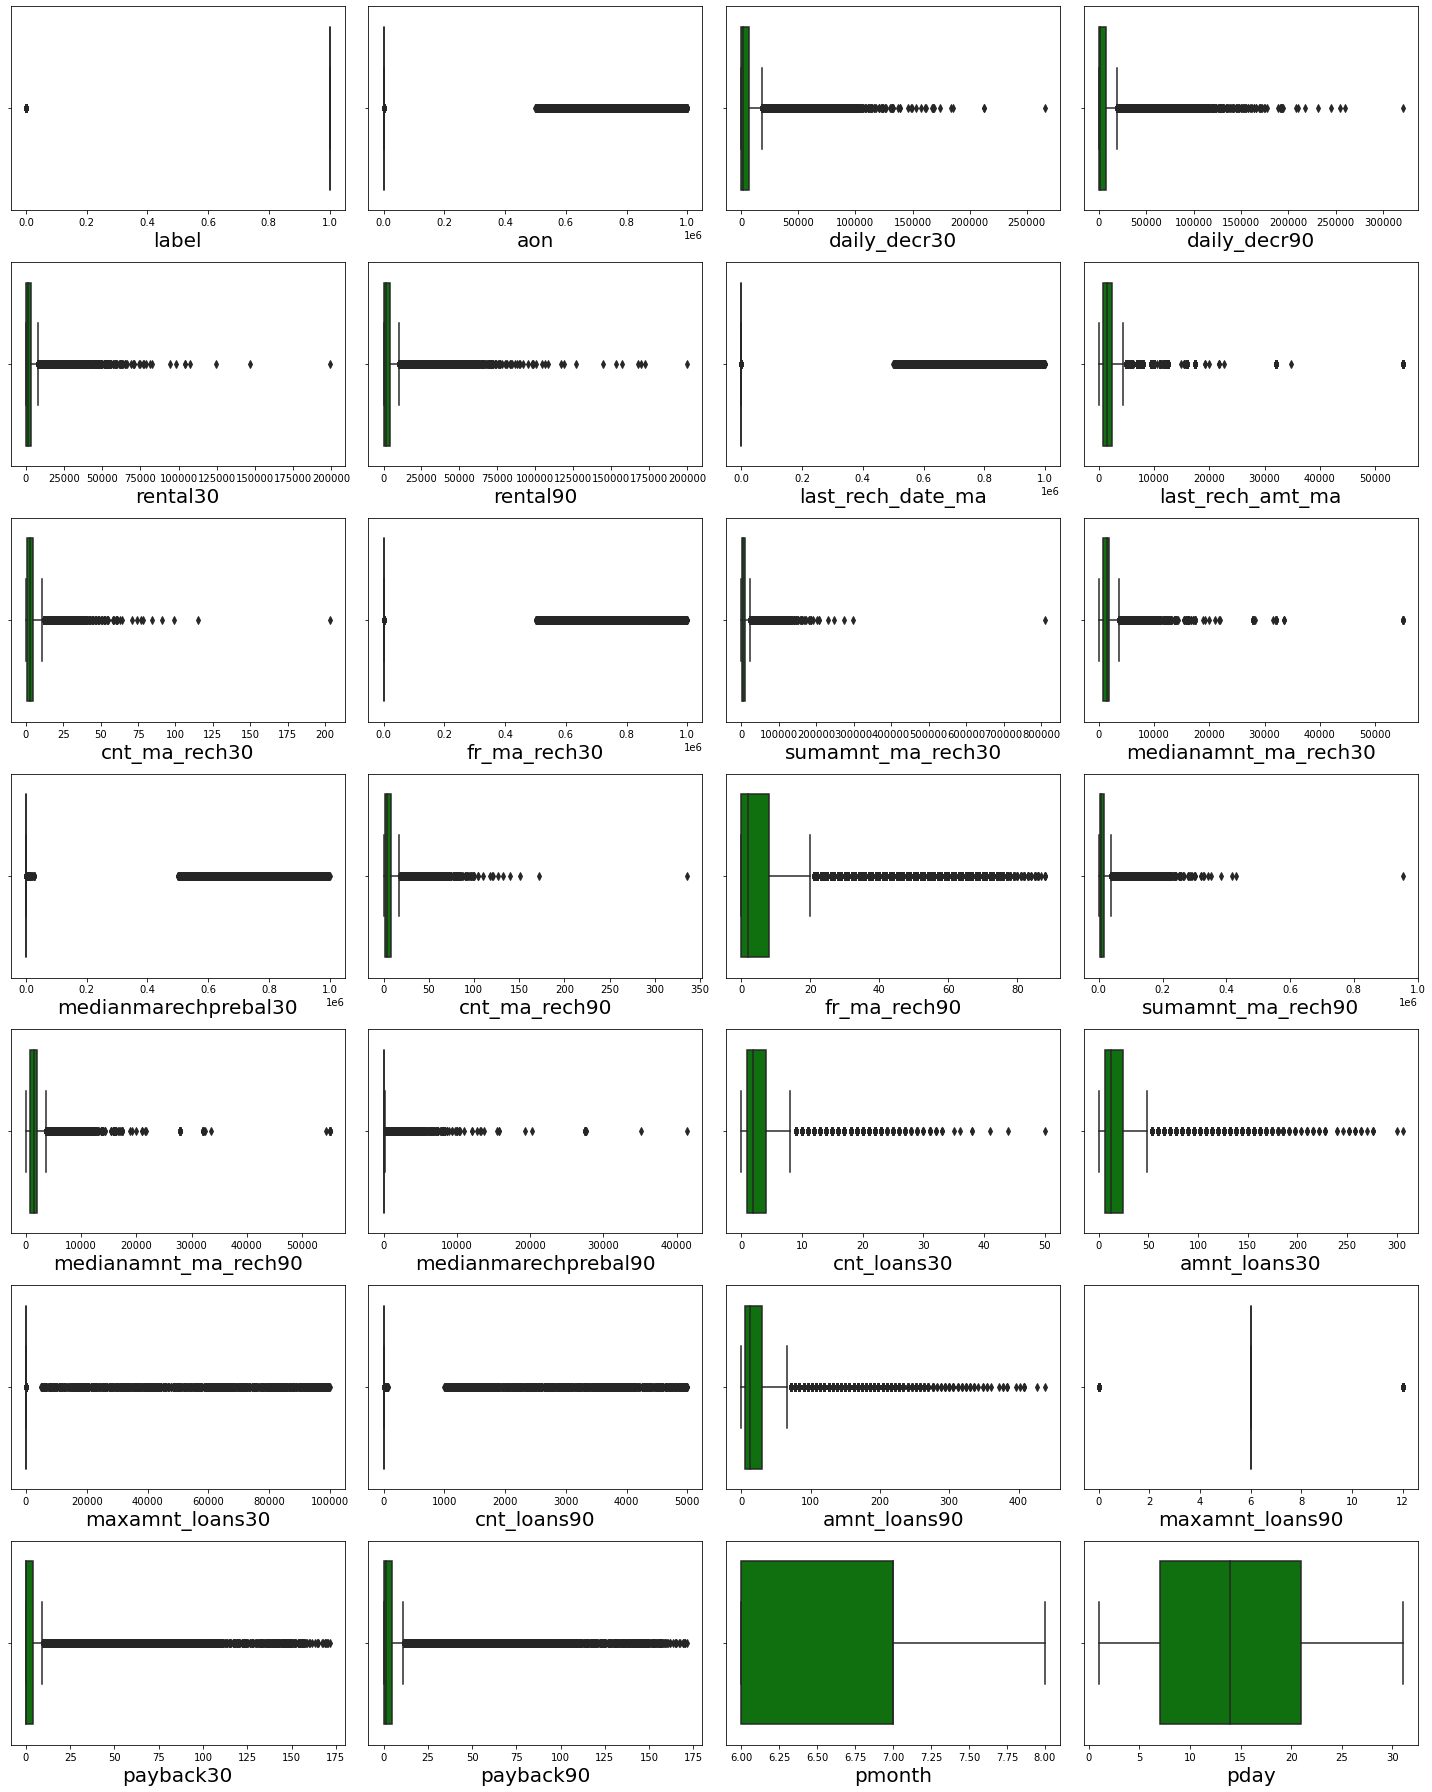

In [33]:
#Checking outliers of all numerical features
plt.figure(figsize = (20,25))
plotnumber = 1
for column in df[num_cols]:
    if plotnumber <= 28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column], color = 'green')
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

* Outliers are present almost in every column.

In [34]:
#Checking skewness
df.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
pmonth                   0.343242
pday                     0.199845
dtype: float64

In [35]:
z = np.abs(zscore(df))
df_new = df[(z < 3).all(axis = 1)]
df_new.skew()

label                   -2.122272
aon                      0.961544
daily_decr30             1.960924
daily_decr90             2.074233
rental30                 2.212635
rental90                 2.250688
last_rech_date_ma        3.431233
last_rech_amt_ma         2.111043
cnt_ma_rech30            1.190993
fr_ma_rech30             2.003238
sumamnt_ma_rech30        1.641840
medianamnt_ma_rech30     2.311152
medianmarechprebal30    10.728163
cnt_ma_rech90            1.331735
fr_ma_rech90             1.980290
sumamnt_ma_rech90        1.710262
medianamnt_ma_rech90     2.353743
medianmarechprebal90     3.799090
cnt_loans30              1.493981
amnt_loans30             1.467309
maxamnt_loans30         52.048143
cnt_loans90              1.729263
amnt_loans90             1.714364
maxamnt_loans90          2.617130
payback30                2.632329
payback90                2.542040
pmonth                   0.462377
pday                     0.179722
dtype: float64

In [36]:
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [37]:
df.shape

(209593, 28)

In [38]:
df_new.shape

(171215, 28)

In [39]:
#Printing data loss after removing skewness
data_loss = (209593 - 171215)/209593 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  18.310726026155454


* 18% data has been remove while removing skewness using zscore.

In [40]:
# Will use percentile method to remove skewness 
cols = df.drop('label', axis = 1)

In [41]:
for col in cols:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01, 0.98]).values
        df[col][df[col] <= percentile[0]] = percentile[0]
        df[col][df[col] >= percentile[1]] = percentile[1]

In [42]:
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974398
daily_decr90            2.091663
rental30                2.115274
rental90                2.203455
last_rech_date_ma       2.541537
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.812125
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.639138
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.405285
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
pmonth                  0.343242
pday                    0.191418
dtype: float64

# Correlation

In [43]:
corr = df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.074534,0.189898,0.189238,0.066738,0.083765,-0.075394,0.143379,0.263196,0.142667,0.241848,0.156869,0.122518,0.263702,0.091247,0.241911,0.136269,0.121964,0.214162,0.215426,0.072931,0.210772,0.222721,0.099686,0.101074,0.088879,0.154949,0.006375
aon,0.074534,1.000000,0.063370,0.064823,0.063600,0.067613,0.028113,0.091279,0.000030,0.041945,0.047881,0.093061,0.038315,0.020450,0.035320,0.066375,0.100941,0.038572,0.035451,0.037758,0.028893,0.063297,0.064977,0.035078,0.017594,0.037535,0.065262,0.009437
daily_decr30,0.189898,0.063370,1.000000,0.982692,0.498414,0.528269,-0.085939,0.291775,0.470003,0.058894,0.622942,0.310315,0.117454,0.621056,-0.080799,0.756823,0.272646,0.080650,0.387131,0.482449,0.403227,0.520219,0.595988,0.466294,0.077077,0.097332,0.584207,0.008584
daily_decr90,0.189238,0.064823,0.982692,1.000000,0.493114,0.540732,-0.079175,0.281795,0.449858,0.060058,0.595937,0.299020,0.115924,0.627046,-0.082917,0.761146,0.266113,0.079304,0.364251,0.461413,0.398676,0.521934,0.598182,0.467024,0.067320,0.090002,0.607837,-0.018899
rental30,0.066738,0.063600,0.498414,0.493114,1.000000,0.959300,-0.045252,0.135063,0.273198,0.050178,0.324065,0.139489,0.046398,0.360221,-0.038470,0.396321,0.118424,0.021113,0.210407,0.265132,0.236621,0.299346,0.342800,0.284222,0.119829,0.143018,0.401231,0.044122
rental90,0.083765,0.067613,0.528269,0.540732,0.959300,1.000000,-0.033589,0.130770,0.268678,0.055363,0.312236,0.132118,0.048569,0.393070,-0.041438,0.420702,0.112348,0.021199,0.200734,0.262470,0.250118,0.323100,0.370547,0.309181,0.114866,0.151062,0.471754,0.016154
last_rech_date_ma,-0.075394,0.028113,-0.085939,-0.079175,-0.045252,-0.033589,1.000000,0.239732,-0.276116,-0.097662,-0.181430,0.056870,-0.003989,-0.202532,0.042234,-0.107542,0.230473,0.107076,-0.237604,-0.229037,-0.063851,-0.190370,-0.196070,-0.036256,-0.158178,-0.100861,0.024881,-0.008118
last_rech_amt_ma,0.143379,0.091279,0.291775,0.281795,0.135063,0.130770,0.239732,1.000000,0.002478,0.096151,0.479300,0.802170,0.204631,0.026627,0.119628,0.457697,0.825576,0.235407,-0.023035,0.015070,0.143613,-0.001272,0.025605,0.175331,-0.041532,-0.018309,0.102653,0.031147
cnt_ma_rech30,0.263196,0.000030,0.470003,0.449858,0.273198,0.268678,-0.276116,0.002478,1.000000,-0.024444,0.709300,0.001963,0.092166,0.890442,-0.159850,0.627004,-0.045966,0.066378,0.766587,0.764247,0.183804,0.683764,0.706401,0.187330,0.124854,0.066263,0.169963,0.076715
fr_ma_rech30,0.142667,0.041945,0.058894,0.060058,0.050178,0.055363,-0.097662,0.096151,-0.024444,1.000000,0.072516,0.186835,0.052332,-0.002494,0.315629,0.073984,0.136871,0.016787,-0.003298,-0.003456,0.037612,0.016968,0.020394,0.041051,0.234456,0.190113,0.087579,0.054757


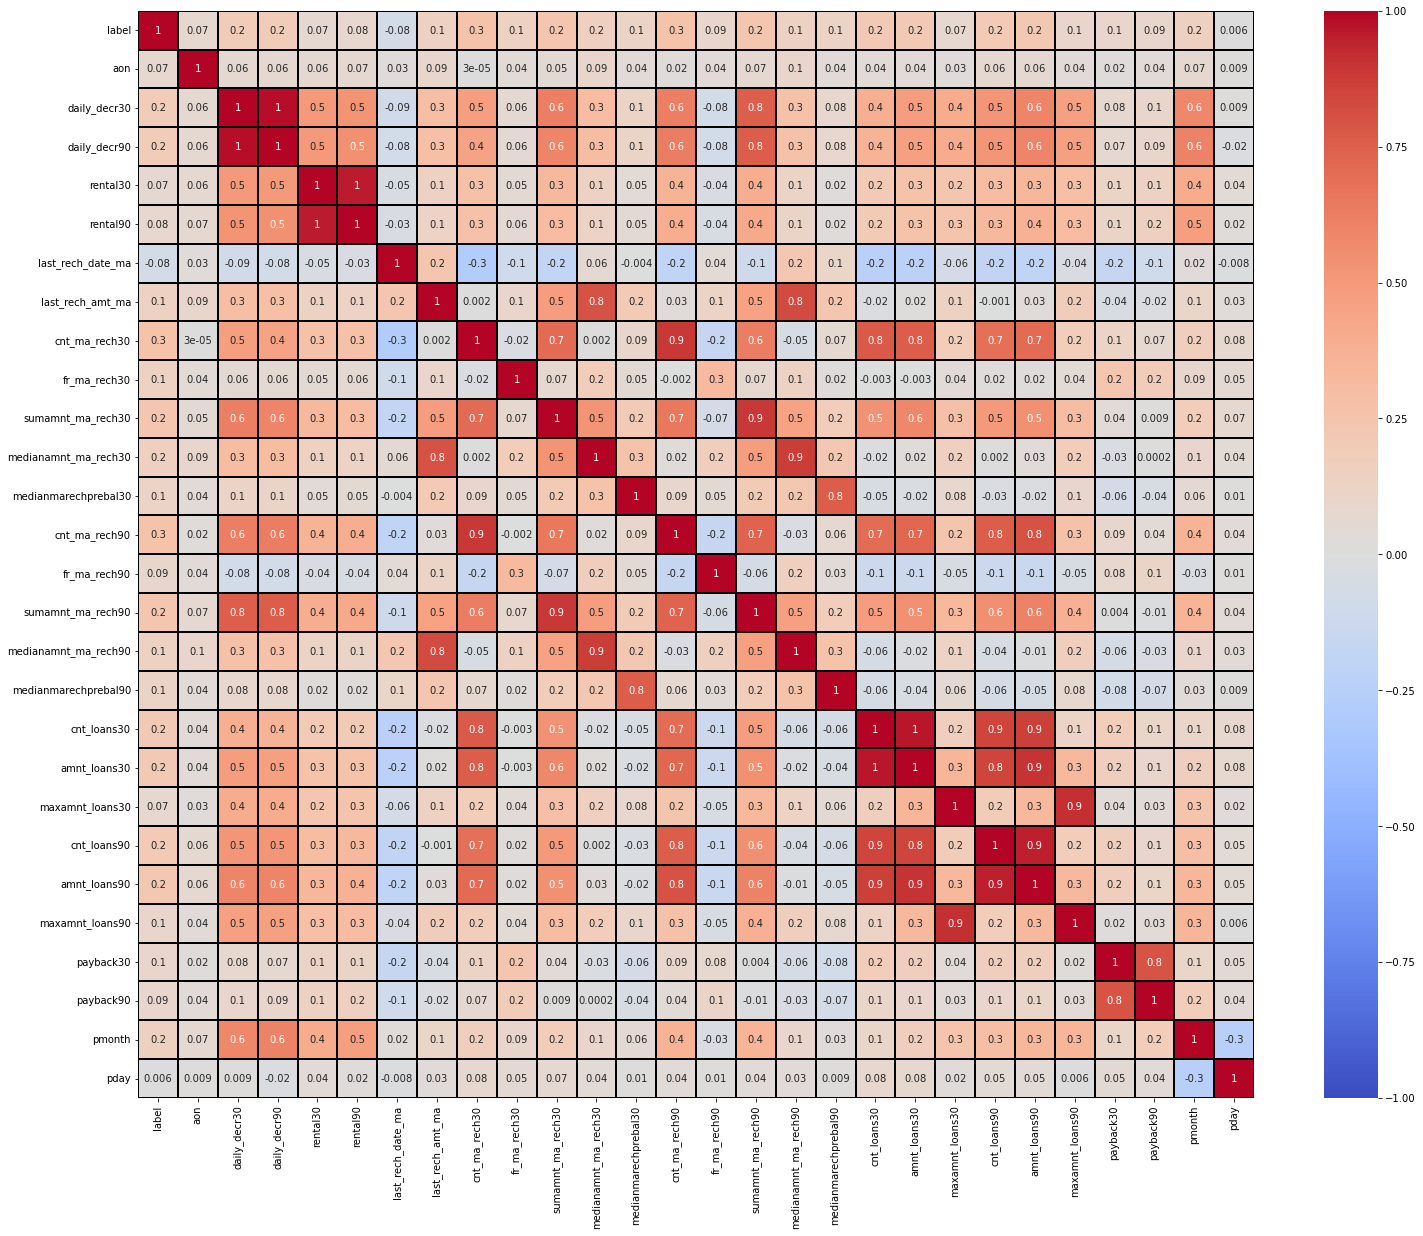

In [44]:
#Visualizing correlation using heatmap
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), linewidth = .1, vmin = -1, vmax = 1, fmt = '.1g', annot = True, linecolor = 'black', annot_kws = {'size':10}, cmap = 'coolwarm')
plt.show()

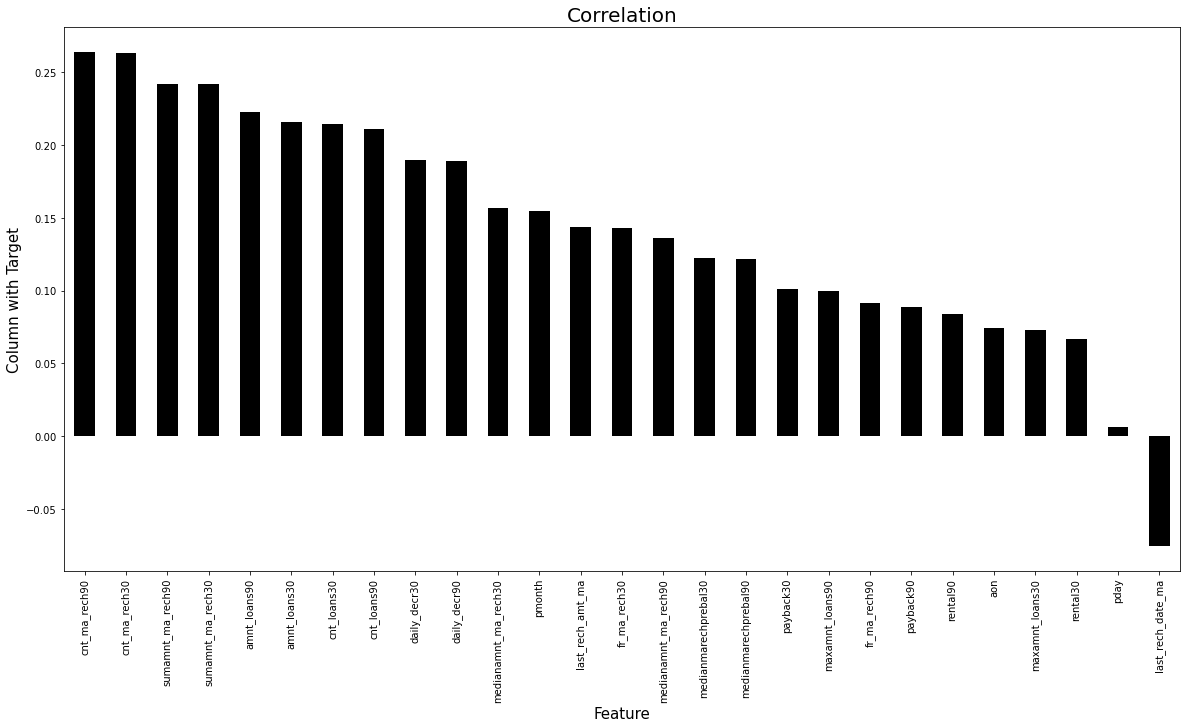

In [45]:
#Visualizing correlation
plt.figure(figsize = (20,10))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind = 'bar', color = 'black')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Column with Target', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

# Spliting Dataset into x and y

In [46]:
x = df.drop('label', axis = 1)
y = df['label']

In [47]:
x.shape

(209593, 27)

In [48]:
y.shape

(209593,)

# Scaling Dataset

In [49]:
#Scaling x dataset using standard scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [50]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,-0.775480,-0.266981,-0.299018,-0.661972,-0.645835,-0.485014,-0.227934,-0.505615,3.207724,-0.532817,-0.124681,-0.565055,-0.666868,1.137849,-0.647836,-0.152031,-0.615063,-0.308676,-0.363032,-0.313984,-0.457500,-0.484224,-0.381303,4.374870,3.953498,0.273360,0.666520
1,0.085677,0.923916,0.720337,0.306769,0.074548,1.579772,1.714425,-0.777010,-0.737124,-0.194773,2.162135,-0.179818,-0.829061,-0.635610,-0.446824,2.136178,-0.146215,-0.758016,-0.363032,2.438144,-0.730012,-0.484224,2.622586,-0.593651,-0.588496,1.622099,-0.521266
2,-0.260743,-0.484626,-0.486600,-0.472194,-0.511464,-0.370303,-0.227934,-0.777010,-0.737124,-0.724862,-0.124681,-0.141826,-0.829061,-0.635610,-0.762033,-0.152031,-0.099978,-0.758016,-0.757610,-0.313984,-0.730012,-0.750688,-0.381303,-0.593651,-0.588496,1.622099,0.547742
3,-0.836153,-0.665458,-0.641510,-0.678915,-0.666980,3.988688,-0.498621,-1.048405,-0.737124,-0.916907,-0.953167,-0.619020,-0.829061,-0.635610,-0.805960,-0.470915,-0.658848,-0.308676,-0.363032,-0.313984,-0.457500,-0.484224,-0.381303,-0.593651,-0.588496,-1.075378,-0.996380
4,0.545613,-0.648463,-0.626951,-0.416720,-0.469731,-0.255593,0.124141,0.851361,-0.361424,1.582422,0.289831,-0.410356,0.306290,-0.466709,0.867211,0.574615,-0.374246,1.938021,1.609861,-0.313984,0.905057,0.848099,-0.381303,-0.110600,-0.223048,-1.075378,0.904078


# Multicollinearity

In [51]:
#Checking multicollinearity problem using VIF
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]

vif['features'] = x.columns

#Let's check the values
vif

,VIF values,features
0,1.025634,aon
1,37.178363,daily_decr30
2,40.793771,daily_decr90
3,14.884511,rental30
4,16.266166,rental90
5,1.403408,last_rech_date_ma
6,3.791469,last_rech_amt_ma
7,15.987665,cnt_ma_rech30
8,1.235113,fr_ma_rech30
9,14.286982,sumamnt_ma_rech30


In [52]:
#Droping ammnt_loans30 and will check VIF value again
x = x.drop('amnt_loans30', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.024743,aon
1,37.082586,daily_decr30
2,40.777314,daily_decr90
3,14.883941,rental30
4,16.265357,rental90
5,1.402486,last_rech_date_ma
6,3.789468,last_rech_amt_ma
7,15.902587,cnt_ma_rech30
8,1.233534,fr_ma_rech30
9,14.268590,sumamnt_ma_rech30


In [53]:
#Droping daily_decr90 and will check VIF value again
x = x.drop('daily_decr90', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.024725,aon
1,3.740542,daily_decr30
2,14.035647,rental30
3,15.285847,rental90
4,1.401147,last_rech_date_ma
5,3.789460,last_rech_amt_ma
6,15.897660,cnt_ma_rech30
7,1.233408,fr_ma_rech30
8,13.719082,sumamnt_ma_rech30
9,6.305107,medianamnt_ma_rech30


In [54]:
#Droping amnt_loans90 and will check VIF value again
x = x.drop('amnt_loans90', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.024051,aon
1,3.662776,daily_decr30
2,13.996720,rental30
3,15.223271,rental90
4,1.400779,last_rech_date_ma
5,3.789337,last_rech_amt_ma
6,15.009548,cnt_ma_rech30
7,1.233386,fr_ma_rech30
8,13.718539,sumamnt_ma_rech30
9,6.305033,medianamnt_ma_rech30


In [55]:
#Droping cnt_ma_rech90 and will check VIF value again
x = x.drop('cnt_ma_rech90', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.023709,aon
1,3.662367,daily_decr30
2,13.923823,rental30
3,15.125169,rental90
4,1.384308,last_rech_date_ma
5,3.785769,last_rech_amt_ma
6,4.994655,cnt_ma_rech30
7,1.232351,fr_ma_rech30
8,10.209660,sumamnt_ma_rech30
9,6.132164,medianamnt_ma_rech30


* Still VIF value is more 10 for sumamnt_ma_rech30, rental30 and rental90 will remove rental90 first and check VIF value again.

In [56]:
#Droping rental90 and will check VIF value again
x = x.drop('rental90', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.023688,aon
1,3.658196,daily_decr30
2,1.405628,rental30
3,1.383888,last_rech_date_ma
4,3.785205,last_rech_amt_ma
5,4.992932,cnt_ma_rech30
6,1.232184,fr_ma_rech30
7,10.022925,sumamnt_ma_rech30
8,6.128677,medianamnt_ma_rech30
9,2.542791,medianmarechprebal30


In [57]:
#Droping sumamnt_ma_rech30 and will check VIF value again
x = x.drop('sumamnt_ma_rech30', axis = 1)

#Scaling x data after removing column ER
scaled = scaler.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.023641,aon
1,3.656836,daily_decr30
2,1.404714,rental30
3,1.372608,last_rech_date_ma
4,3.704315,last_rech_amt_ma
5,3.794636,cnt_ma_rech30
6,1.231646,fr_ma_rech30
7,5.491308,medianamnt_ma_rech30
8,2.542739,medianmarechprebal30
9,1.181667,fr_ma_rech90


* Multicollinearity issue have been resolved.

# Will remove skewness using Power Transformer

In [58]:
#Checking skewness
x.skew()

aon                     0.935197
daily_decr30            1.974398
rental30                2.115274
last_rech_date_ma       2.541537
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.812125
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.639138
cnt_loans30             1.576547
maxamnt_loans30         1.405285
cnt_loans90             1.923139
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
pmonth                  0.343242
pday                    0.191418
dtype: float64

In [59]:
#Will remove remaining skewness by using Power Tranform
PT = PowerTransformer(method = 'yeo-johnson')
transform = PT.fit_transform(x)

In [60]:
x = pd.DataFrame(transform)
x.columns = x.columns

In [61]:
x.skew()

0     0.165056
1     0.503958
2     0.434207
3     0.386837
4     0.088448
5     0.157594
6     0.401400
7     0.031871
8     0.456073
9     0.562098
10    0.258478
11    0.017663
12    0.371218
13    0.243776
14   -1.211862
15    0.368220
16    2.241299
17    0.488292
18    0.446371
19    0.129386
20    0.032528
dtype: float64

* Skewness have been removed from the dataset.

# Oversampling

In [62]:
#Will balance out the data using SMOTE
smt = SMOTE()
x, y = smt.fit_resample(x, y)
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

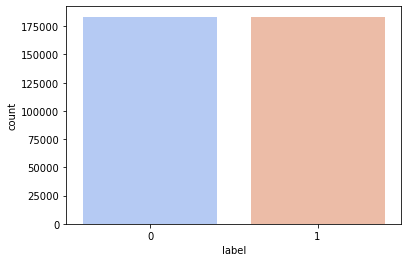

In [63]:
#Visualizing balanced dataset
sns.countplot(y, palette = 'coolwarm')
plt.show()

# Model Building

In [68]:
#Find best Random_state
maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7744129311872214 on Random State = 52


In [69]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 52)

# XGB Classifier

In [71]:
XGB = XGBClassifier(verbosity = 0)
XGB.fit(x_train,y_train)
predxg = XGB.predict(x_test)
Accuracy_Score = accuracy_score(y_test, predxg) * 100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, x, y, cv = 5).mean() * 100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.73103185095336
Confusion Matrix: [[34309  2206]
 [ 1660 35198]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     36515
           1       0.94      0.95      0.95     36858

    accuracy                           0.95     73373
   macro avg       0.95      0.95      0.95     73373
weighted avg       0.95      0.95      0.95     73373


Cross validation score : 93.53329207079291
\Accuracy_Score - Cross Validation Score : 1.1977397801604468


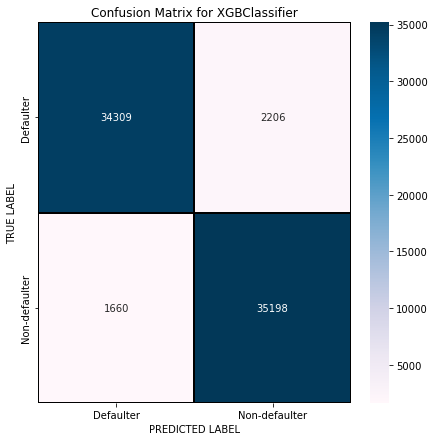

In [72]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "PuBu", xticklabels = x_axis_labels, yticklabels = y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

# DecisionTreeClassifier:

In [73]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt = DTC.predict(x_test)
Accuracy_Score = accuracy_score(y_test, preddt) * 100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, x, y, cv = 5).mean() * 100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 90.8753901298843
Confusion Matrix: [[33478  3037]
 [ 3658 33200]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     36515
           1       0.92      0.90      0.91     36858

    accuracy                           0.91     73373
   macro avg       0.91      0.91      0.91     73373
weighted avg       0.91      0.91      0.91     73373


Cross validation score : 90.50298153825032
\Accuracy_Score - Cross Validation Score : 0.37240859163397033


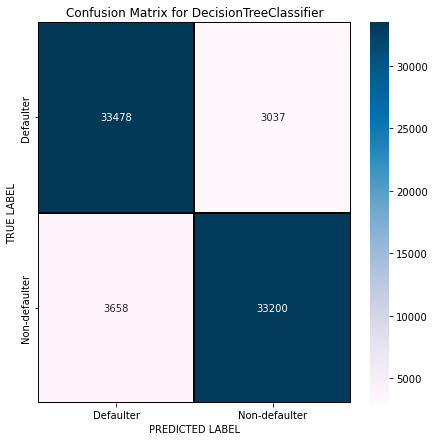

In [74]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "PuBu", xticklabels = x_axis_labels, yticklabels = y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

# Bagging Classifier

In [75]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predbc = BC.predict(x_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 93.74292996061222
Confusion Matrix: [[34917  1598]
 [ 2993 33865]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     36515
           1       0.95      0.92      0.94     36858

    accuracy                           0.94     73373
   macro avg       0.94      0.94      0.94     73373
weighted avg       0.94      0.94      0.94     73373


Cross validation score : 93.26396423539809
\Accuracy_Score - Cross Validation Score : 0.47896572521412395


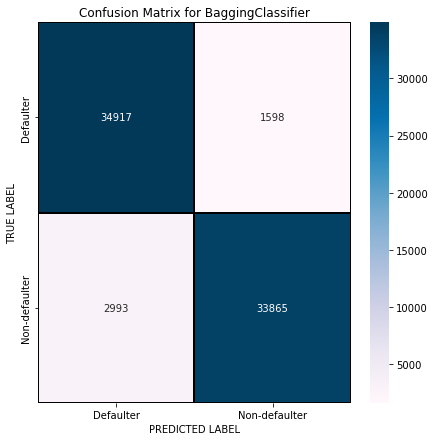

In [76]:
cm = confusion_matrix(y_test, predbc)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "PuBu", xticklabels = x_axis_labels, yticklabels = y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

# AdaBoost Classifier

In [77]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predab = ABC.predict(x_test)
Accuracy_Score = accuracy_score(y_test, predab) * 100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, x, y, cv = 5).mean() * 100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 84.13040219154185
Confusion Matrix: [[31449  5066]
 [ 6578 30280]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     36515
           1       0.86      0.82      0.84     36858

    accuracy                           0.84     73373
   macro avg       0.84      0.84      0.84     73373
weighted avg       0.84      0.84      0.84     73373


Cross validation score : 83.82117009460079
\Accuracy_Score - Cross Validation Score : 0.30923209694105935


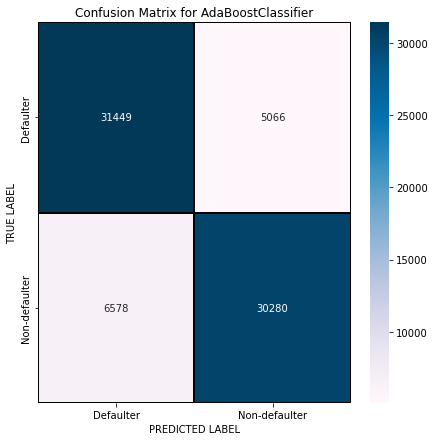

In [78]:
cm = confusion_matrix(y_test, predab)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "PuBu", xticklabels = x_axis_labels, yticklabels = y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

# Random Forest Classifier

In [80]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predad = RFC.predict(x_test)
Accuracy_Score = accuracy_score(y_test, predad) * 100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predad))
print(classification_report(y_test,predad))

#cross validation score
scores = cross_val_score(RFC, x, y, cv = 5).mean() * 100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("n\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 95.49834407752171
Confusion Matrix: [[35156  1359]
 [ 1944 34914]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     36515
           1       0.96      0.95      0.95     36858

    accuracy                           0.95     73373
   macro avg       0.96      0.96      0.95     73373
weighted avg       0.96      0.95      0.95     73373


Cross validation score : 95.04883243985077
n\Accuracy_Score - Cross Validation Score : 0.4495116376709376


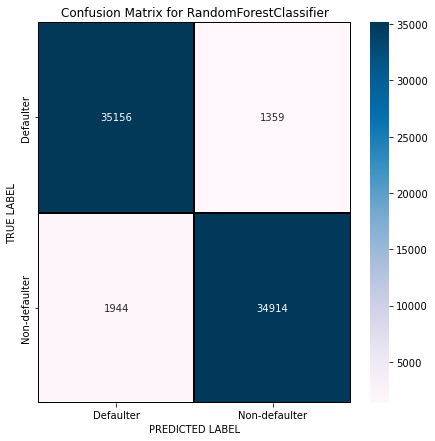

In [81]:
cm = confusion_matrix(y_test, predad)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths = 0.2, linecolor = "black", fmt = ".0f", ax = ax, cmap = "PuBu", xticklabels = x_axis_labels, yticklabels = y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# ROC-AUC curve:

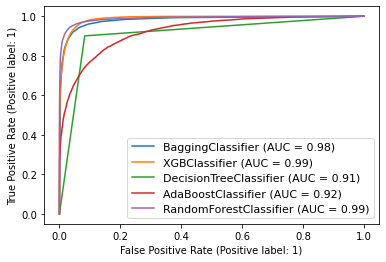

In [83]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,x_test,y_test)
plot_roc_curve(XGB, x_test, y_test, ax = disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

• AUC value is high for XGBClassifier and RandomForestClassifier. I got least difference in model accuracy and cross validation score for RandomForestClassifier so RFC is my best model.

# Saving Model

In [87]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFC, open('Defaulter', 'wb'))

In [88]:
#Loading saved model
loaded_model = pickle.load(open('Defaulter','rb'))

In [89]:
label = loaded_model.predict(x_test)
label

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [94]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Defaulter': y_test, 'Predicted Defaulter': label})
DF.head(5)

,Actual Defaulter,Predicted Defaulter
277329,0,0
327450,0,0
241572,0,0
84974,1,0
219792,0,0


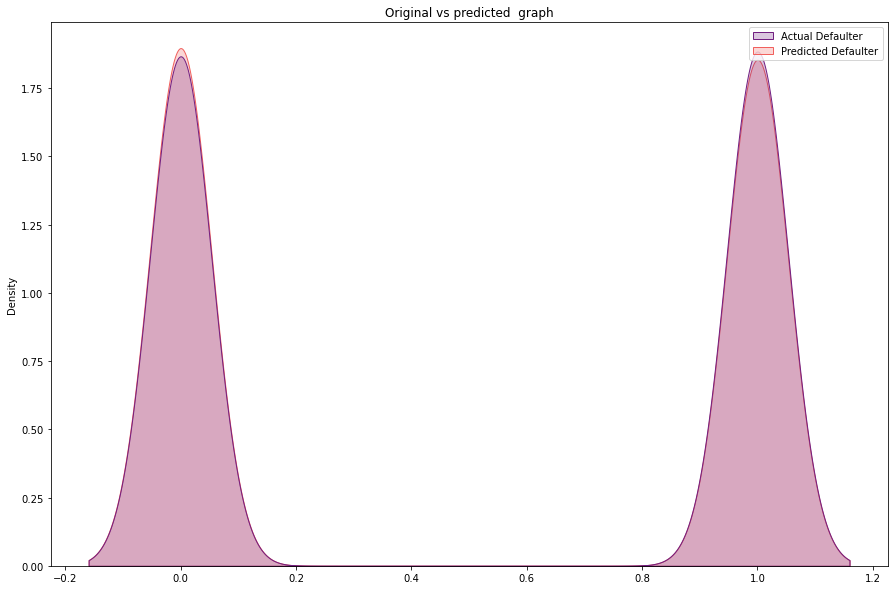

In [93]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = DF, palette = 'magma', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()